In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150
%matplotlib inline
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14, top=True, direction="in")
plt.rc("ytick", labelsize=14, right=True, direction="in")
plt.rc("axes", titlesize=14)
plt.rc("legend", fontsize=14, loc="upper left")

cm = 1.5/2.54 #define ratio for cm and inches

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_1'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [4]:
time = [] #array for all time data lists
V1 = [] #Same again for votlage readings

for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=3)
    time.append(Data[:, 0])
    V1.append(Data[:, 1])  # Assuming V1 is in the first column
    #print(time)
    #print(V1)

In [5]:
#Here we make the functions for the fits used
#Guesses for the linear function
a_lin_guess = 1.2 
n_lin_guess = 1.3 
offset_lin_guess = 0.4
p0_lin = [a_lin_guess, n_lin_guess, offset_lin_guess]

l = 0.065 #cm length of weird tube we compress the air in
freq_constant = (2*np.pi)/(633e-9)*l

#Linear fit function hoping that it works on a linear fit
def Linear_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    return amplitude *(np.cos(freq_constant*2*(n-1)*t)) + offset

#Guesses for the quadratic fit
a_quad_guess = 2
n_quad_guess = 1.3
offset_quad_guess = 0.4
m_quad_guess = 0
p0_Quad = [a_quad_guess, n_quad_guess, offset_quad_guess, m_quad_guess]

#Quadratic fit function if it works like this
def Quad_fit(t, *p): 
    amplitude = p[0]
    n = p[1]
    offset = p[2]
    m = p[3]
    return amplitude *(np.cos(freq_constant*2*((n-1)*t**2+m*t))) + offset

Linear Parameters:
Amplitude: -0.0031776599283531138 $\pm$ 0.005145140409418551
k: 1.30000001996757 $\pm$ 2.870683295379668e-07
Offset: 14.117499070982268 $\pm$ 0.003632738714974046

Quadratic Parameters:
Amplitude: -0.012985199517685984 +/- [0]
k: 1.300000055184892 +/- 2.264717117310841e-08
Offset: 14.117513429864042 +/- 0.0036328193726898246
n: -2.6499614172055085e-08 +/- 1.0998706436909427e-07


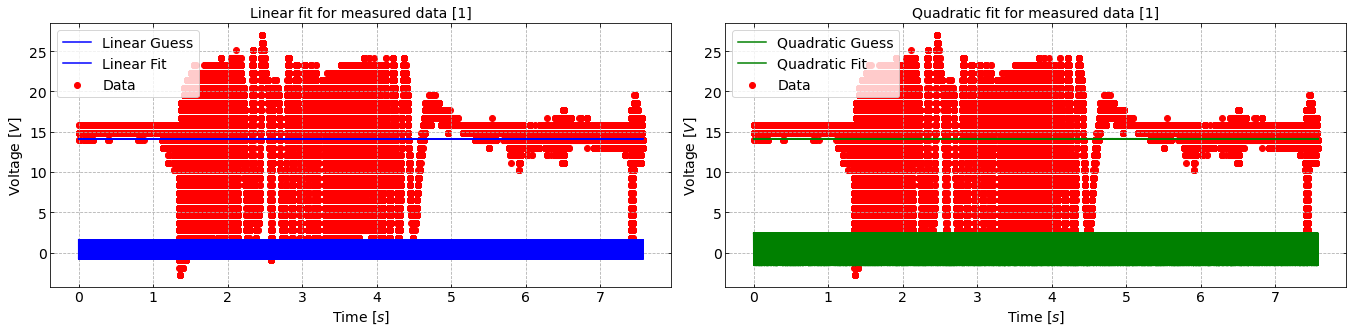

Linear Parameters:
Amplitude: -0.0023844215329898097 $\pm$ 0.005215708523301484
k: 1.3000020655944924 $\pm$ 4.093431805079711e-07
Offset: 14.399650037967248 $\pm$ 0.003682847835575086

Quadratic Parameters:
Amplitude: -0.020326151288724455 +/- [0]
k: 1.3000000761147394 +/- 2.062862182162981e-08
Offset: 14.39973142642142 +/- 0.003683161192071463
n: -2.0829633718913098e-07 +/- 1.0789720813226572e-07


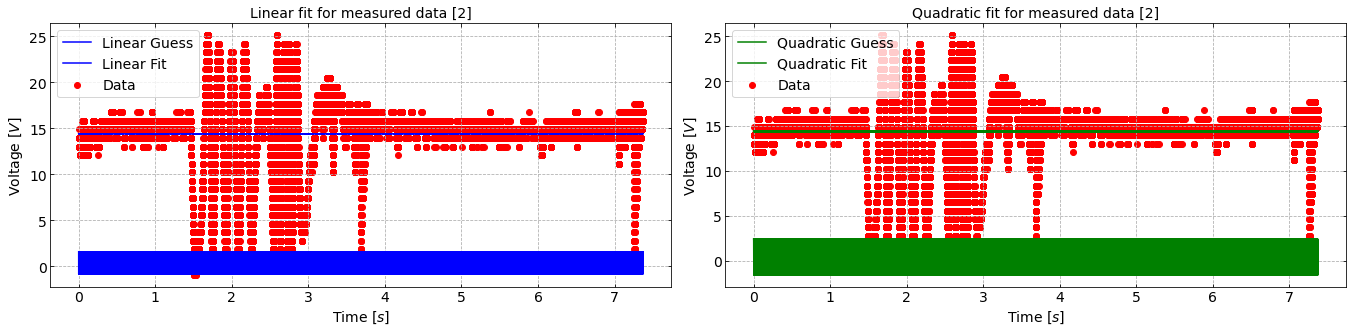

Linear Parameters:
Amplitude: -0.0025656917996309055 $\pm$ 0.0053272588414986395
k: 1.2999969413369534 $\pm$ 4.463206185017364e-07
Offset: 14.007535606652006 $\pm$ 0.0037620579230233505

Quadratic Parameters:
Amplitude: 0.014370109021937643 +/- [0]
k: 1.2999999815135146 +/- 4.640800943658768e-08
Offset: 14.007486339440275 +/- 0.003762282501952172
n: 2.4721389644030186e-07 +/- 2.3533339569099448e-07


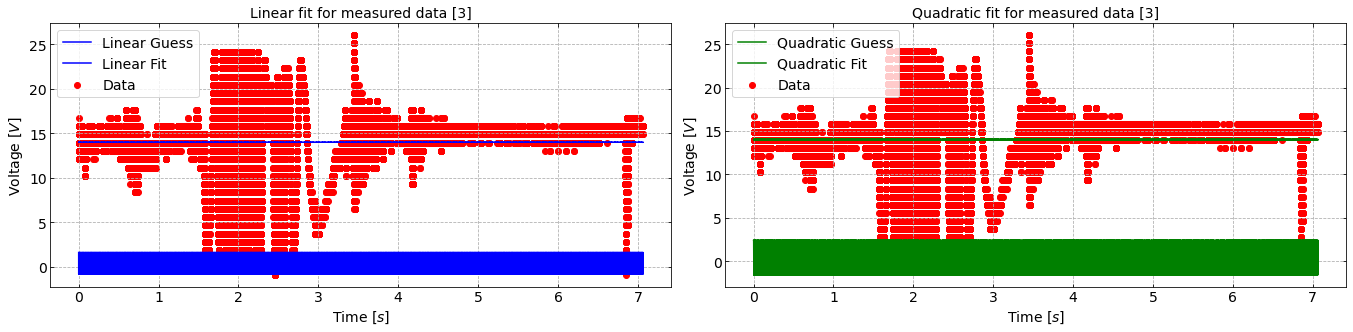

Linear Parameters:
Amplitude: 0.002079536500524681 $\pm$ 0.004889372771145919
k: 1.3000007060601877 $\pm$ 3.76269780978535e-07
Offset: 11.978471978407876 $\pm$ 0.003450985186788337

Quadratic Parameters:
Amplitude: -0.06999467266588107 +/- [0]
k: 1.3000000130257943 +/- 2.0484581038947973e-09
Offset: 11.978928608650072 +/- 0.0034513905056524955
n: 2.3932680323042597e-09 +/- 3.5726077222299907e-09


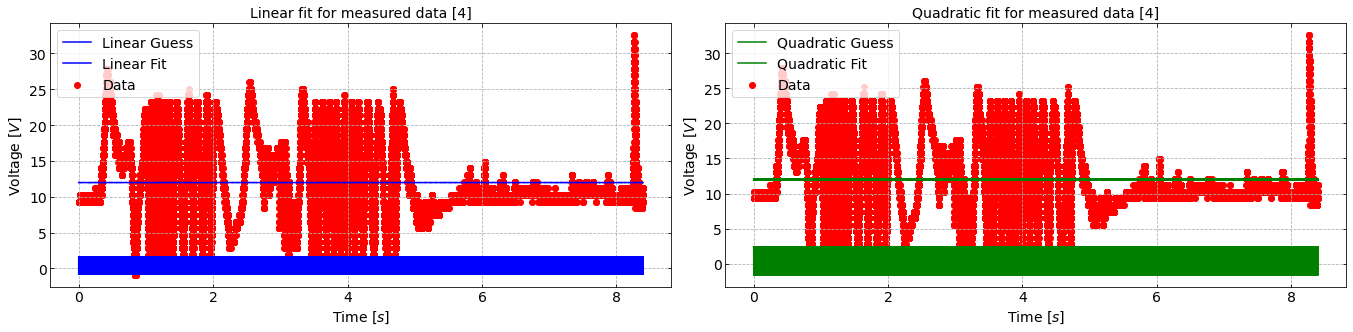

Linear Parameters:
Amplitude: 0.00020450877218106635 $\pm$ 0.00466877746612424
k: 1.300000445309131 $\pm$ 3.2114531075255097e-06
Offset: 13.72190299000708 $\pm$ 0.0032940392199267074

Quadratic Parameters:
Amplitude: -0.038790949042159246 +/- [0]
k: 1.3000000196086254 +/- 3.3625337067678246e-09
Offset: 13.722120831751452 +/- 0.003294289004007293
n: -8.008464805546066e-09 +/- 1.128056452792907e-08


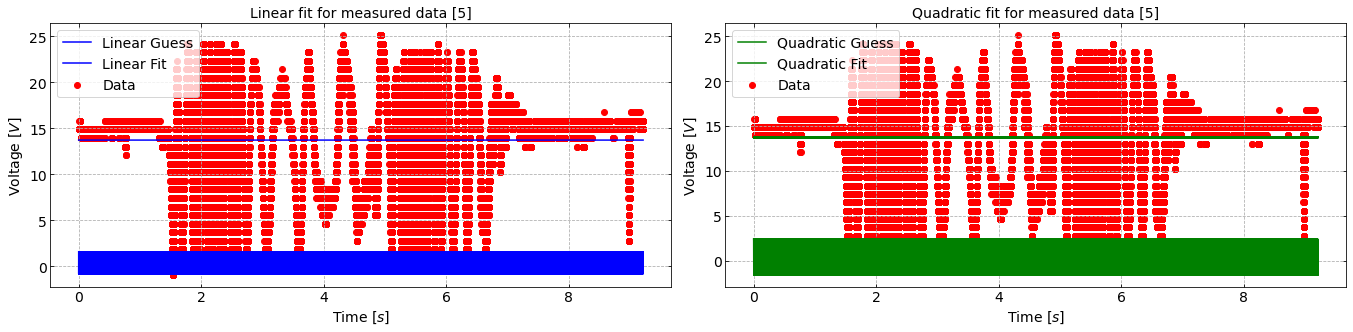

Linear Parameters:
Amplitude: 0.0006601122822267654 $\pm$ 0.00456928303755126
k: 1.3000000660322806 $\pm$ 9.637375586576314e-07
Offset: 13.649128823942398 $\pm$ 0.0032231913869759936

Quadratic Parameters:
Amplitude: 0.009260521319440206 +/- [0]
k: 1.3000000020671212 +/- 1.4078314452325415e-08
Offset: 13.649113643847931 +/- 0.0032231998470231846
n: -2.9118564334933305e-06 +/- 8.231501234987588e-08


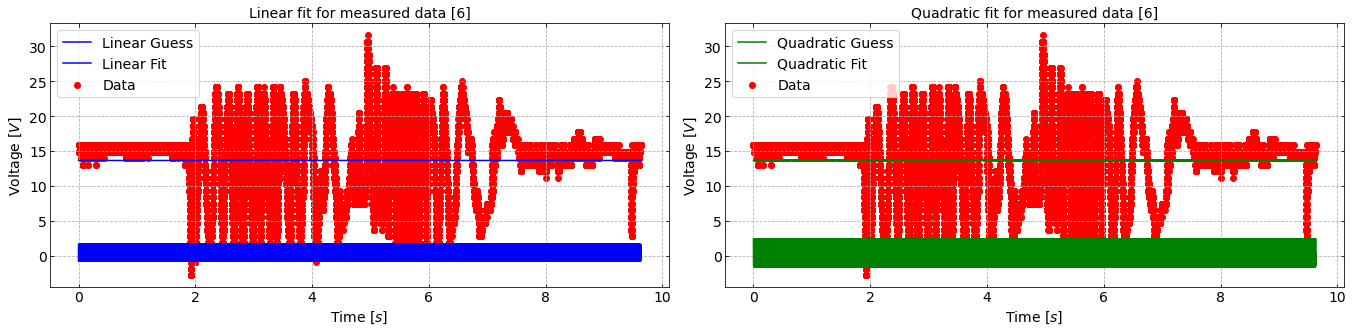

Linear Parameters:
Amplitude: -0.0015694011775700904 $\pm$ 0.004483698080495319
k: 1.3000000665497875 $\pm$ 3.8391974457949493e-07
Offset: 13.507104843123694 $\pm$ 0.003162214420788679

Quadratic Parameters:
Amplitude: 0.06119327997803832 +/- [0]
k: 1.3000000130089993 +/- 2.1923698842311056e-09
Offset: 13.506592454064844 +/- 0.003162424517749307
n: 2.568695740641646e-08 +/- 1.1298876775066046e-08


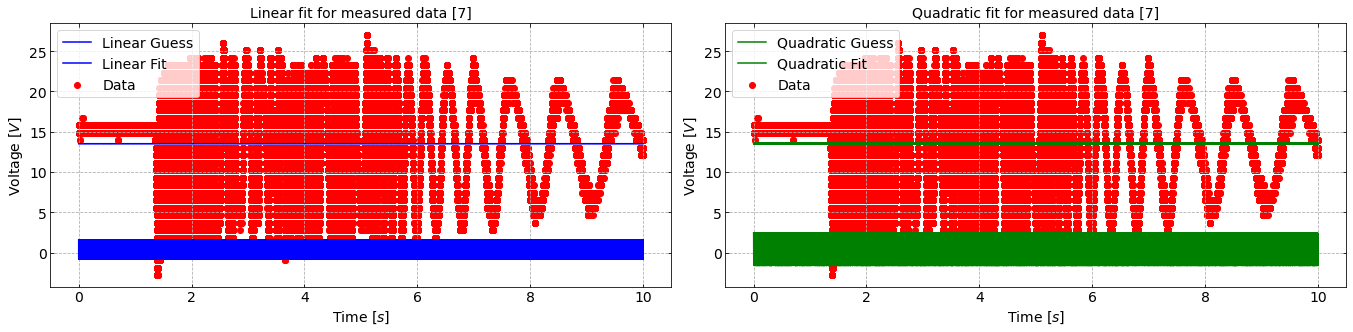

Linear Parameters:
Amplitude: -0.0029126722691940076 $\pm$ 0.004618211974993672
k: 1.300000039566595 $\pm$ 2.2622379731894402e-07
Offset: 13.554795557610692 $\pm$ 0.0032580377339282885

Quadratic Parameters:
Amplitude: 7.776417867297195e-05 +/- [0]
k: 1.3000000897577813 +/- 2.316656277603372e-06
Offset: 13.554803105541215 +/- 0.003258045264404928
n: 9.677960188877204e-08 +/- 1.3378428177958536e-05


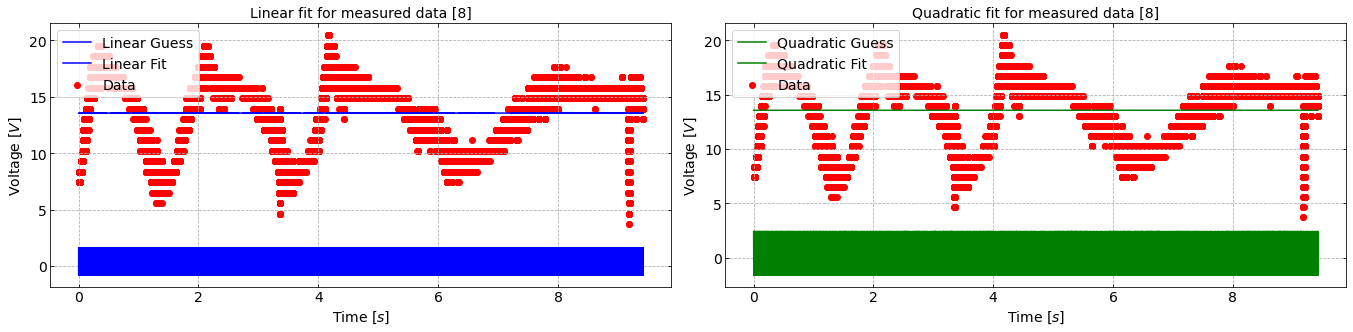

Linear Parameters:
Amplitude: -0.002561885677467741 $\pm$ 0.004483676900182426
k: 1.300000148244362 $\pm$ 2.7841258798831876e-07
Offset: 13.743217780815563 $\pm$ 0.0031622144052114018

Quadratic Parameters:
Amplitude: 0.025871411846922786 +/- [0]
k: 1.2999999794403843 +/- 1.2079708437436564e-08
Offset: 13.743120166110318 +/- 0.0031624448337052415
n: 3.1596398557697717e-10 +/- 2.1128454512123185e-08


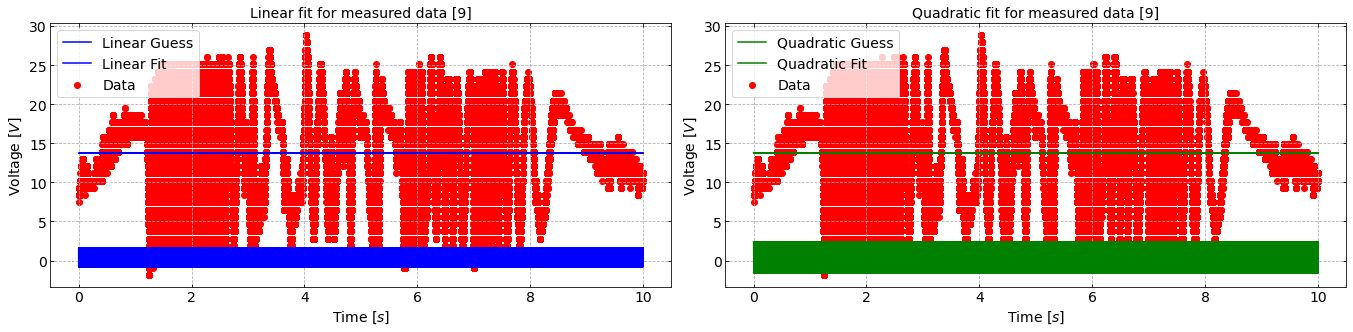

Linear Parameters:
Amplitude: -0.0036052855452287803 $\pm$ 0.011049099242333748
k: 1.300000724403962 $\pm$ 2.5177293322384408e-06
Offset: 14.624986398466458 $\pm$ 0.00781250006355158

Quadratic Parameters:
Amplitude: -0.028693969837367807 +/- [0]
k: 1.300004045241177 +/- 9.868023227017e-07
Offset: 14.624951074183851 +/- 0.007813230503247972
n: -1.3179132680282794e-05 +/- 1.2519093747204e-06


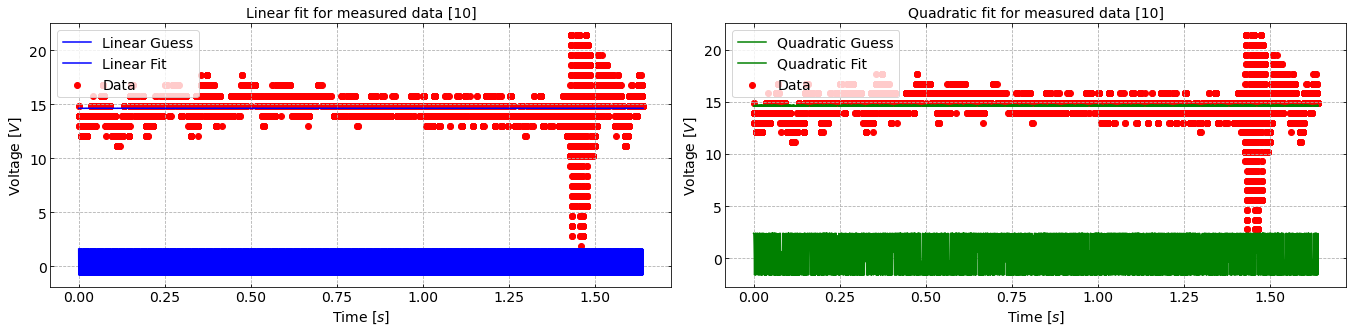

Linear Parameters:
Amplitude: -0.003322565279233521 $\pm$ 0.008208386804616712
k: 1.300000079493887 $\pm$ 1.1374912606327594e-06
Offset: 13.536915321092602 $\pm$ 0.005802979352085008

Quadratic Parameters:
Amplitude: 0.014629543947255543 +/- [0]
k: 1.3000008562550305 +/- 4.3039917552366617e-07
Offset: 13.536894911174738 +/- 0.005803081786585053
n: -4.569065795932283e-06 +/- 9.864381250301013e-07


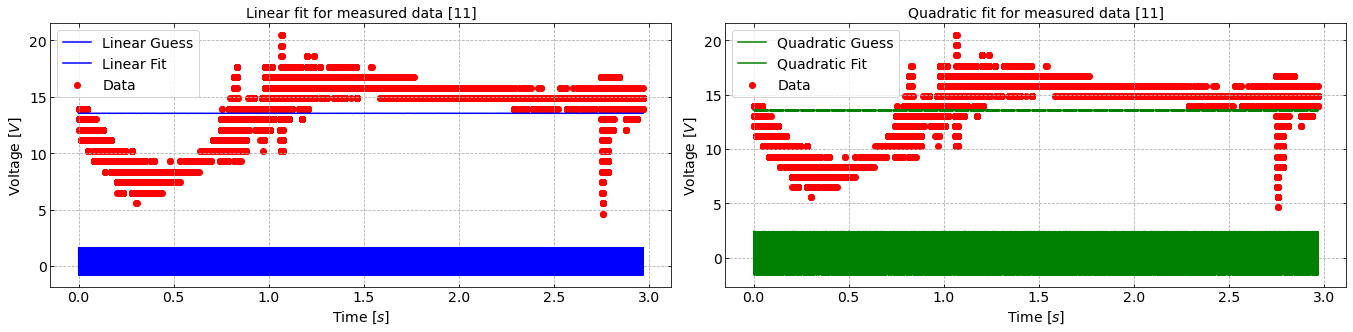

Linear Parameters:
Amplitude: 0.0007995688957682656 $\pm$ 0.004483697974198146
k: 1.2999999999456393 $\pm$ 7.538477052994128e-07
Offset: 12.48603441060844 $\pm$ 0.0031622144217085214

Quadratic Parameters:
Amplitude: -0.0015452571375059697 +/- [0]
k: 1.300000007753546 +/- 6.267797833280064e-09
Offset: 12.486055062296346 +/- 0.003162451685558769
n: 2.3582431552791798e-08 +/- 1.0841979202317708e-08


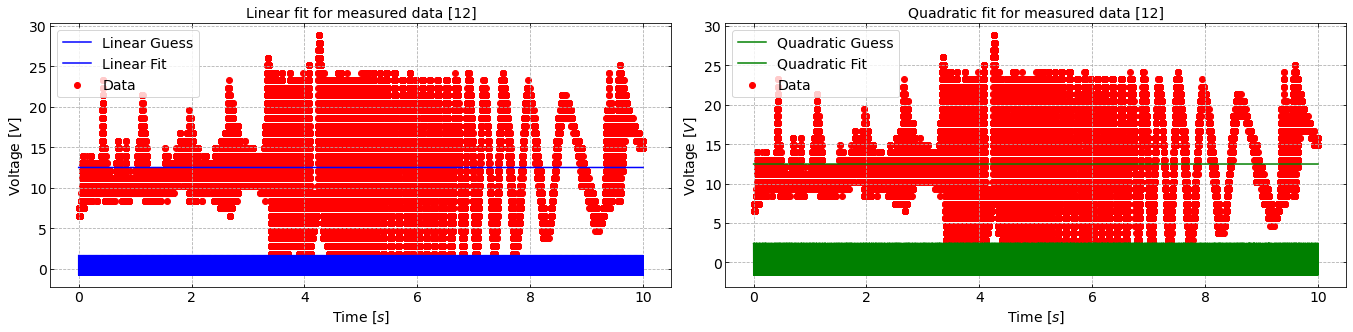

Linear Parameters:
Amplitude: -0.0014631709521766125 $\pm$ 0.005180027276606227
k: 1.3000001833774024 $\pm$ 1.0550008133712786e-06
Offset: 13.878401653688444 $\pm$ 0.0036575358589178712

Quadratic Parameters:
Amplitude: 0.0024941289609710458 +/- [0]
k: 1.3000000049856522 +/- 1.435798594034203e-08
Offset: 13.878408463971867 +/- 0.003657843217502547
n: 3.7290396542751e-08 +/- 3.0089771864540804e-08


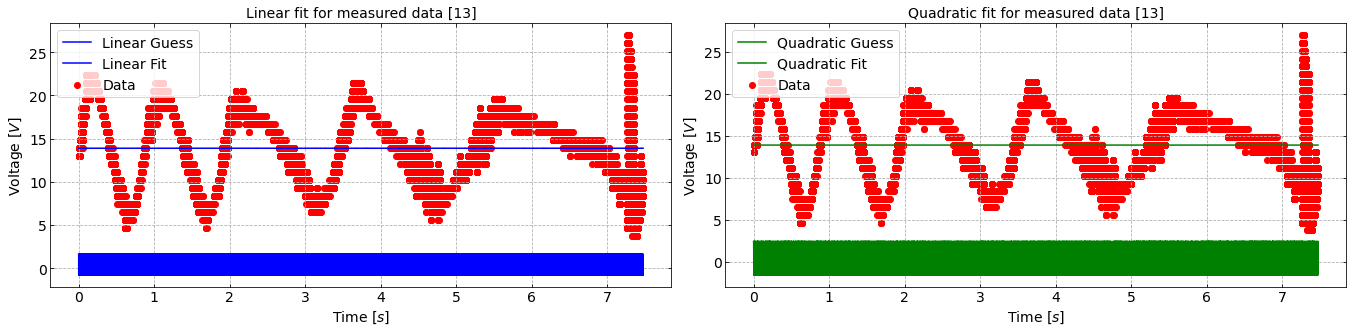

Linear Parameters:
Amplitude: -0.004665699636633207 $\pm$ 0.004483690565009382
k: 1.3000000969664436 $\pm$ 1.361390677053084e-07
Offset: 14.03997476665348 $\pm$ 0.0031622144079294155

Quadratic Parameters:
Amplitude: 0.03148418366047821 +/- [0]
k: 1.3000000891712375 +/- 2.952329240416283e-09
Offset: 14.039861214371651 +/- 0.0031622471450816424
n: -3.021303609400063e-07 +/- 1.7313814573091562e-08


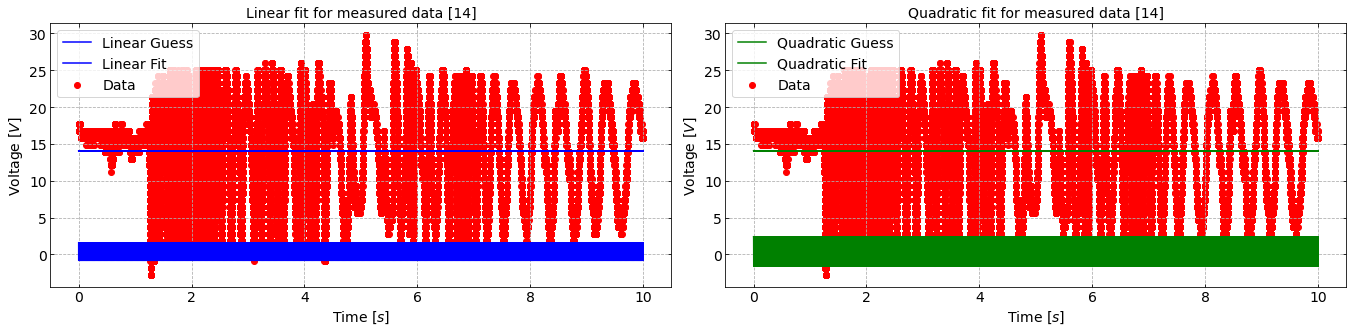

Linear Parameters:
Amplitude: -0.001704303848412888 $\pm$ 0.004668769928698373
k: 1.2999999161646258 $\pm$ 4.531458874968236e-07
Offset: 13.231227026272112 $\pm$ 0.0032940392270378186

Quadratic Parameters:
Amplitude: -0.004104163980958606 +/- [0]
k: 1.300000032476404 +/- 4.6273599224126555e-08
Offset: 13.23123617643815 +/- 0.0032942749760576148
n: 7.045367036074442e-08 +/- 2.627842025386495e-07


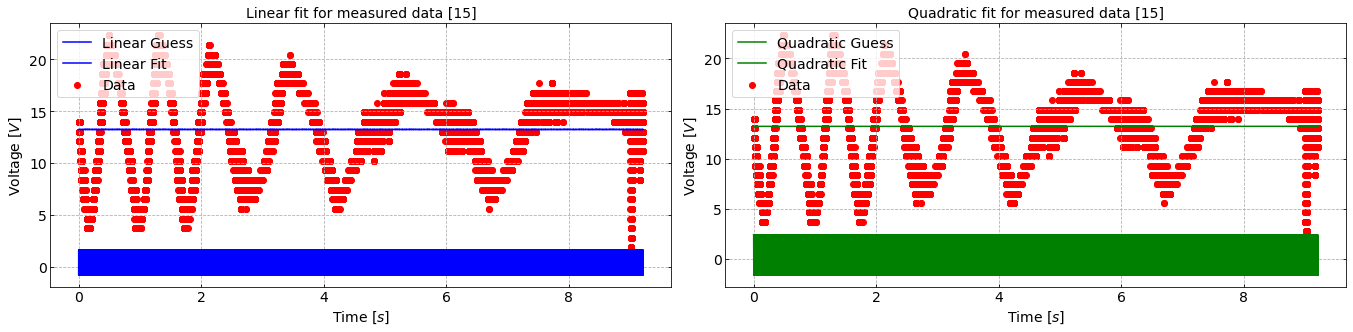

Linear Parameters:
Amplitude: -0.0019368463052820278 $\pm$ 0.0044836768129876995
k: 1.2999998513462767 $\pm$ 4.134925830060778e-07
Offset: 13.191897760338097 $\pm$ 0.0031622144162281613

Quadratic Parameters:
Amplitude: 0.01370236809889093 +/- [0]
k: 1.3000000053053407 +/- 1.0355457107518168e-08
Offset: 13.191769993477585 +/- 0.003162427832740789
n: -4.597105221153257e-08 +/- 2.3824863617912043e-08


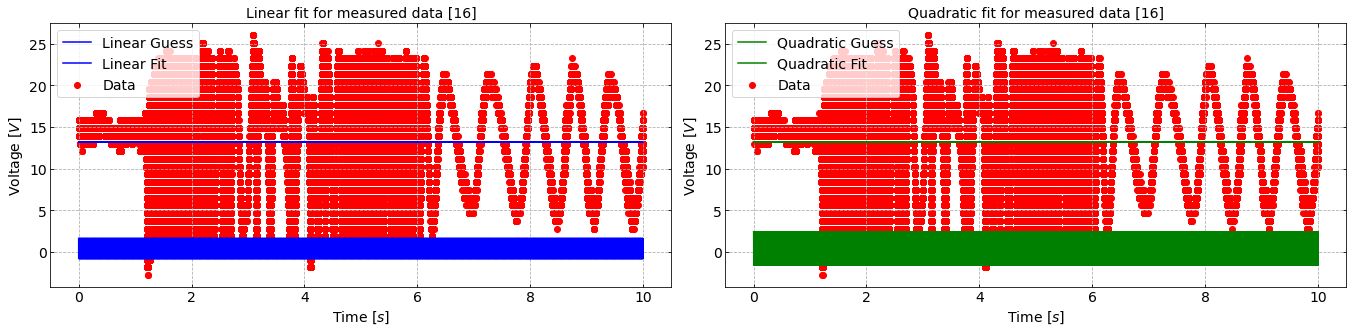

Linear Parameters:
Amplitude: -0.00036169841518036646 $\pm$ 0.004483694802699146
k: 1.3000001571584014 $\pm$ 1.6708359671727448e-06
Offset: 14.327941404507042 $\pm$ 0.0031622144253124432

Quadratic Parameters:
Amplitude: -0.0166364543506553 +/- [0]
k: 1.3000000972978991 +/- 9.08860752885749e-09
Offset: 14.328067576852959 +/- 0.0031622559483734766
n: -2.3626101897196852e-07 +/- 5.323314299698295e-08


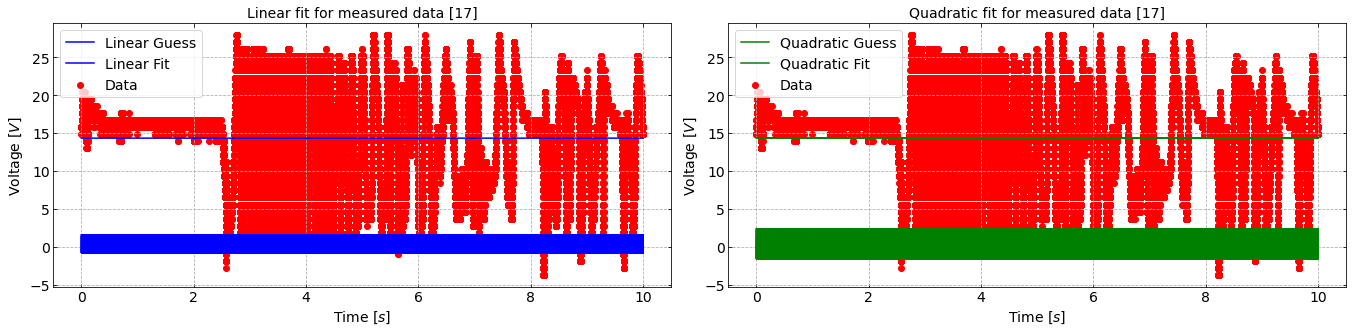

Linear Parameters:
Amplitude: -0.0002888025714538056 $\pm$ 0.004775207828711877
k: 1.2999999999818503 $\pm$ 2.5232501378610656e-06
Offset: 13.637249785097504 $\pm$ 0.003369774153271587

Quadratic Parameters:
Amplitude: 0.007766715440253414 +/- [0]
k: 1.2999999965496523 +/- 5.073774086130761e-09
Offset: 13.637143516441599 +/- 0.0033700440935595898
n: 2.0149204911529285e-08 +/- 1.1412036922853887e-08


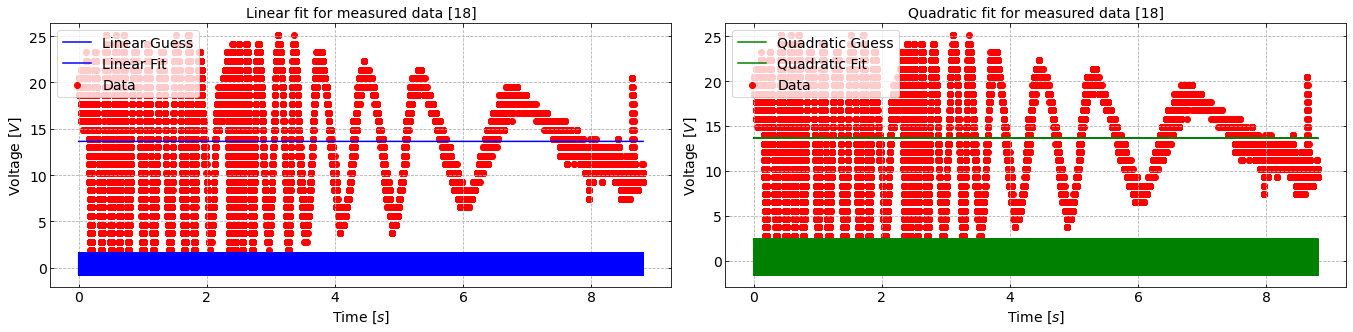

Linear Parameters:
Amplitude: -0.0006883538595422171 $\pm$ 0.004483697569890611
k: 1.3000001120840137 $\pm$ 8.776168197813793e-07
Offset: 14.040881078748333 $\pm$ 0.0031622144100239297

Quadratic Parameters:
Amplitude: -0.0452490304389241 +/- [0]
k: 1.3000000385396515 +/- 3.206470211017785e-09
Offset: 14.040844129384768 +/- 0.0031622897150474557
n: 5.1012265414674405e-08 +/- 1.8127760460569905e-08


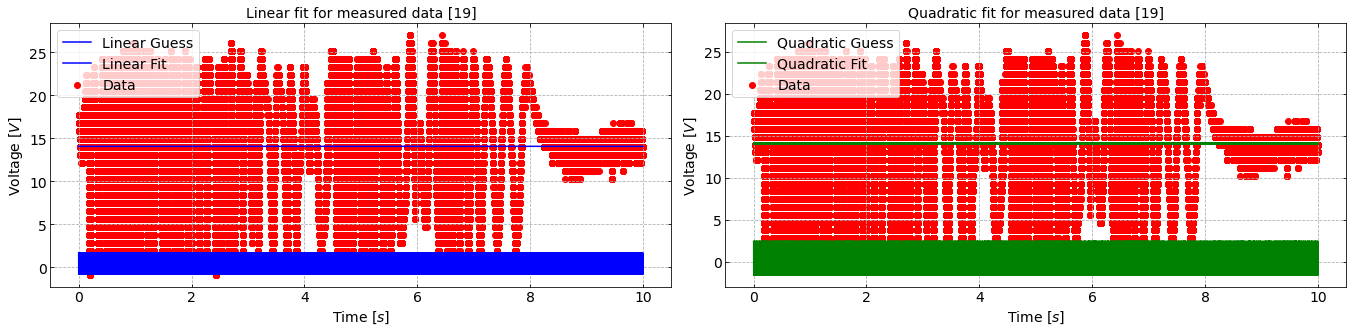

Linear Parameters:
Amplitude: -0.002853241304088346 $\pm$ 0.013324920165614025
k: 1.3000011052234082 $\pm$ 5.584353522736156e-06
Offset: 11.51704648314502 $\pm$ 0.009422229727627351

Quadratic Parameters:
Amplitude: -0.09931854944819238 +/- [0]
k: 1.29999263246936 +/- 7.319455496511919e-07
Offset: 11.516745969443841 +/- 0.009423785242919234
n: 7.691848809272977e-06 +/- 6.36751399671388e-07


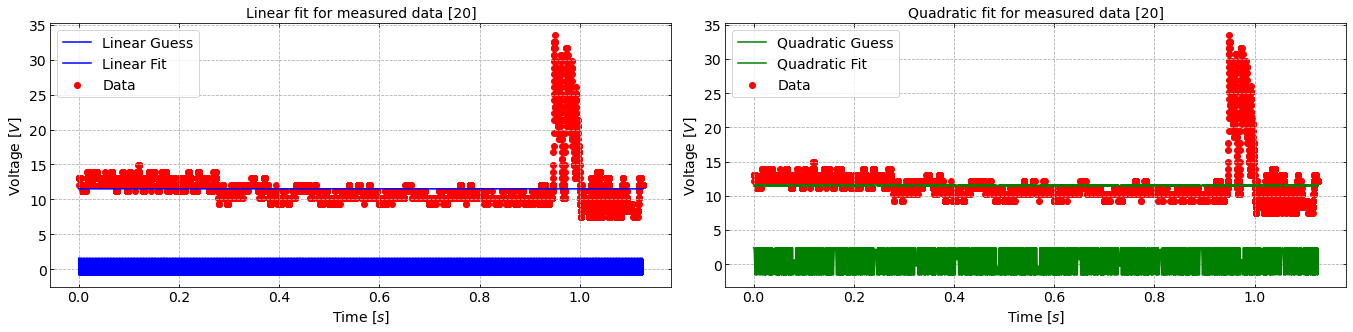

In [7]:
#Here using subplots to get 6 graphs for each iteration together.

lin_const = []
lin_sigma = []
quad_const =[]
quad_sigma =[]

fig, axes = plt.subplots(1,2, figsize=(32*cm,8*cm)) #figure done in inches, use this to choose a good scale
axes = axes.flatten() #Means we can iterate over it

#Here is my loop where i plot for curve fits with different powers.
for i in range(len(time)):
    # Linear fit
    axes[0].cla()  # Clear the first subplot
    plt.sca(axes[0])  # Set current axis to the first subplot
    popt_1, pcov_1 = sp.curve_fit(Linear_fit, time[i], V1[i], p0=p0_lin, absolute_sigma=True)
    # Calculate the standard deviations of the fitted parameters
    lin_err = np.sqrt(np.diag(pcov_1))
    plt.title(f'Linear fit for measured data {[i+1]}')
    plt.plot(time[i], Linear_fit(time[i], *p0_lin), label='Linear Guess', color='blue')  # Plot linear fit
    plt.plot(time[i], Linear_fit(time[i], *popt_1), label='Linear Fit', color='blue')  # Plot linear fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.grid(ls = '--')
    plt.legend()

    # Quadratic fit
    axes[1].cla()  # Clear the first subplot
    plt.sca(axes[1])  # Set current axis to the second subplot
    popt_2, pcov_2 = sp.curve_fit(Quad_fit, time[i], V1[i], p0=p0_Quad, absolute_sigma=True)
    #calc standard deviation of the fitted parameters
    quad_err = np.sqrt(np.diag(pcov_2))
    plt.title(f'Quadratic fit for measured data {[i+1]}')
    plt.plot(time[i], Quad_fit(time[i], *p0_Quad), label='Quadratic Guess', color='green')  # Plot quadratic fit
    plt.plot(time[i], Quad_fit(time[i], *popt_2), label='Quadratic Fit', color='green')  # Plot quadratic fit
    plt.scatter(time[i], V1[i], label='Data', color='red')  # Plot data points
    plt.xlabel('Time [$s$]')
    plt.ylabel('Voltage [$V$]')
    plt.legend()
    plt.grid(ls = '--')
    plt.tight_layout()
    
    #Print statements to get the fitted parameters
    print("Linear Parameters:")
    print("Amplitude:", popt_1[0], '$\pm$', lin_err[0])
    print("n:", popt_1[1], '$\pm$', lin_err[1])
    lin_const.append(popt_1[1])
    lin_sigma.append(lin_err[1])
    print("Offset:", popt_1[2], '$\pm$', lin_err[2])
    print()
    print("Quadratic Parameters:")
    print("Amplitude:", popt_2[0], "+/-", [0])
    print("n:", popt_2[1], "+/-", quad_err[1])
    print("Offset:", popt_2[2], "+/-", quad_err[2])
    print("m:", popt_2[3], "+/-", quad_err[3])
    plt.show()